In [8]:
from icecube import icetray, dataio, dataclasses, simclasses, clsim
from icecube.icetray import I3Units, OMKey, I3Frame
from icecube.dataclasses import ModuleKey
import numpy as np
import matplotlib.pylab as plt
from scipy import stats
from scipy.optimize import minimize
from scipy.stats.distributions import chi
import scipy.constants as spc

In [9]:
'''

Loading the geometry

'''

gcd_file = dataio.I3File('/home/users/akatil/P-ONE/GCD_files/PONE_Phase1.i3.gz')
cframe = gcd_file.pop_frame()
geometry = cframe["I3Geometry"]
omgeo = geometry.omgeo
print('loaded geometry')

loaded geometry


In [10]:
start = 0
end = 1

In [11]:
xCoG = ([])
yCoG = ([])
zCoG = ([])

xCoG_fv, yCoG_fv, zCoG_fv = ([]), ([]), ([])

xCoG_sv, yCoG_sv, zCoG_sv = ([]), ([]), ([])



for file_num in range(start,end):
    print(file_num)
    file = dataio.I3File('/data/p-one/akatil/step_4_medium_water/step_4_'+str(file_num)+'_medium_water_custom_mDOM_noise.i3.gz')
    
    x, y, z = ([]), ([]), ([])
    xfv, yfv, zfv = ([]), ([]), ([])
    xsv, ysv, zsv = ([]), ([]), ([])
    charge = ([])
    
    maxHits = 0
    timestamps = 0
    
    for frame in file:
        #print(frame.keys())
        mctree = frame["I3MCTree"]
        primary = mctree.primaries
        lepton = dataclasses.I3MCTree.first_child(mctree, primary[0].id)

        if lepton.type == 15 or lepton.type == -15:
            
            tau_daughters = dataclasses.I3MCTree.get_daughters(mctree, lepton.id)
            tau_pos = lepton.pos
            x_tau_pos = tau_pos.x
            y_tau_pos = tau_pos.y
            z_tau_pos = tau_pos.z

            for td in range(0, len(tau_daughters)):
                if tau_daughters[td].type == 16 or tau_daughters[td].type == -16:
                    #print(tau_daughters[td])
                    tau_daughters_pos = tau_daughters[td].pos
                    x_td_pos = tau_daughters_pos.x
                    y_td_pos = tau_daughters_pos.y
                    z_td_pos = tau_daughters_pos.z
                    
            mcpeMap = frame['MCPESeriesMap']
            noiseMap = frame['NoiseSeriesMap']
            
            for omkey in noiseMap.keys():
                oKey = omgeo.get(omkey)
                
                domPos = oKey.position
                x_dom = domPos.x
                y_dom = domPos.y
                z_dom = domPos.z
        
                #noise_mcpeList = noiseMap[omkey]
                #noise_timeList = np.array([mcpe.time for mcpe in noise_mcpeList])
                #mcpeList = mcpeMap[omkey]
                #timeList = np.array([mcpe.time for mcpe in mcpeList])
                #tot_timeList = np.append(timeList, noise_timeList)
                
                noise_mcpeList = noiseMap[omkey]
                noise_timeList = np.array([mcpe.time for mcpe in noise_mcpeList])
            
                if omkey in mcpeMap.keys():
                    mcpeList = mcpeMap[omkey]
                    timeList = np.array([mcpe.time for mcpe in mcpeList])
                    tot_timeList = np.append(timeList, noise_timeList)
                else:
                    tot_timeList = noise_timeList
                    
                charge = np.append(charge, len(tot_timeList))
                
                if len(tot_timeList) > maxHits:
                    maxHits = len(tot_timeList)
                    timestamps = tot_timeList
                    max_x_dom = x_dom
                    max_y_dom = y_dom
                    max_z_dom = z_dom
                
                firstVertex = np.sqrt((x_dom - x_tau_pos)**2 + (y_dom - y_tau_pos)**2 + (z_dom - z_tau_pos)**2)
                secondVertex = np.sqrt((x_dom - x_td_pos)**2 + (y_dom - y_td_pos)**2 + (z_dom - z_td_pos)**2)
                refractiveIndex = 1.333
                speed_of_light_water = (spc.c)/refractiveIndex #[Units: m/seconds]
                speed_of_light_ns = speed_of_light_water
                
                x = np.append(x, x_dom)
                y = np.append(y, y_dom)
                z = np.append(z, z_dom)
                
                xfv = np.append(xfv, x_dom-x_tau_pos)
                yfv = np.append(yfv, y_dom-y_tau_pos)
                zfv = np.append(zfv, z_dom-z_tau_pos)
                
                xsv = np.append(xsv, x_dom-(x_tau_pos - x_td_pos)/2)
                ysv = np.append(ysv, y_dom-(y_tau_pos - y_td_pos)/2)
                zsv = np.append(zsv, z_dom-(z_tau_pos - z_td_pos)/2)
                
                tDiff_ns = ((firstVertex - secondVertex)/speed_of_light_water) * 1e9 #[Units: nanoseconds]
                #timeDiff = np.append(timeDiff, tDiff_ns)
            
            xCoG = np.append(xCoG,sum(x*charge)/sum(charge))
            yCoG = np.append(yCoG,sum(y*charge)/sum(charge))
            zCoG = np.append(zCoG,sum(z*charge)/sum(charge))
            
            xCoG_fv = np.append(xCoG_fv,sum(xfv*charge)/sum(charge))
            yCoG_fv = np.append(yCoG_fv,sum(yfv*charge)/sum(charge))
            zCoG_fv = np.append(zCoG_fv,sum(zfv*charge)/sum(charge))
            
            xCoG_sv = np.append(xCoG_sv,sum(xsv*charge)/sum(charge))
            yCoG_sv = np.append(yCoG_sv,sum(ysv*charge)/sum(charge))
            zCoG_sv = np.append(zCoG_sv,sum(zsv*charge)/sum(charge))

0


0


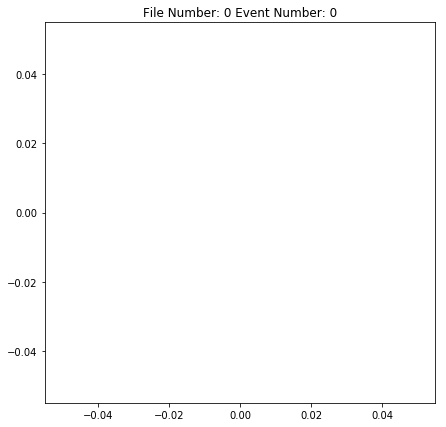

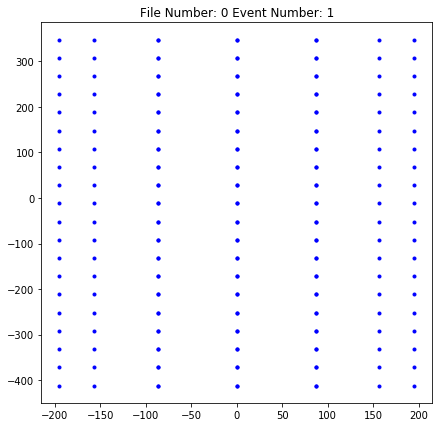

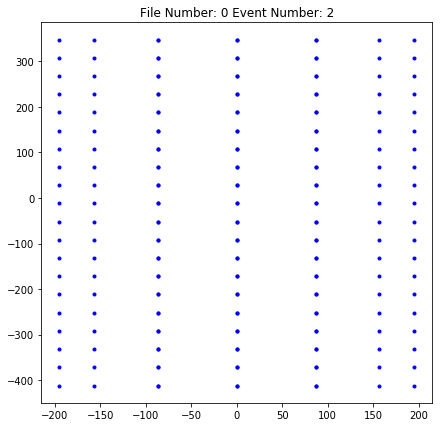

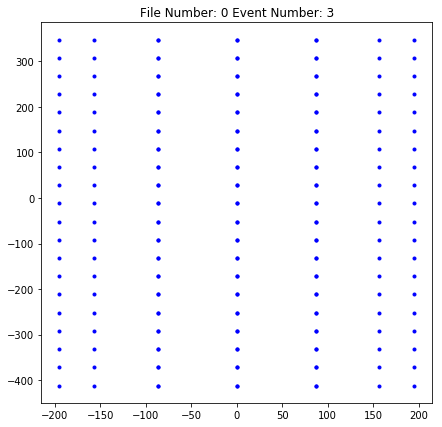

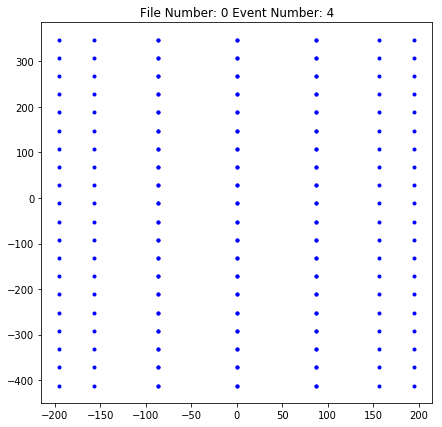

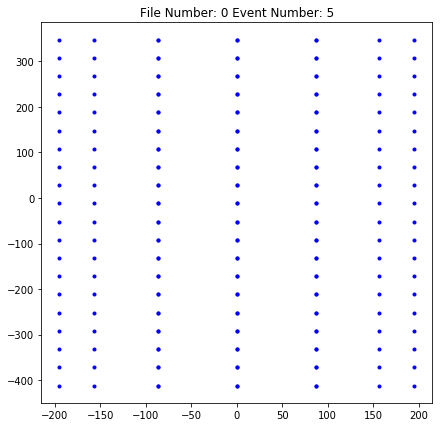

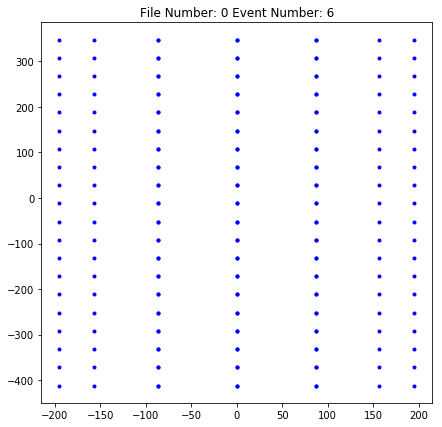

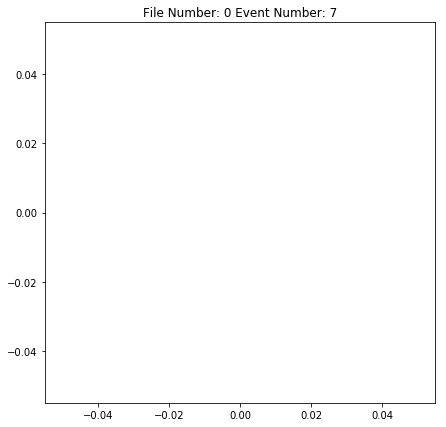

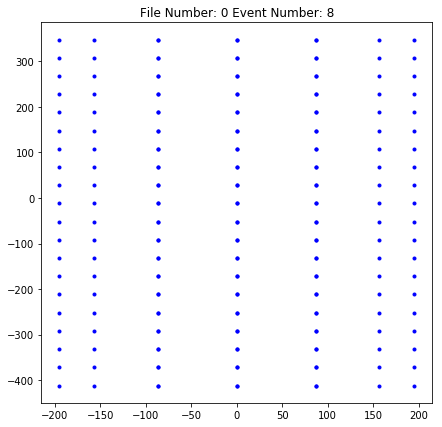

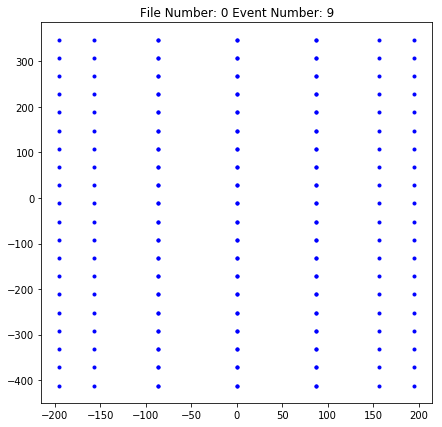

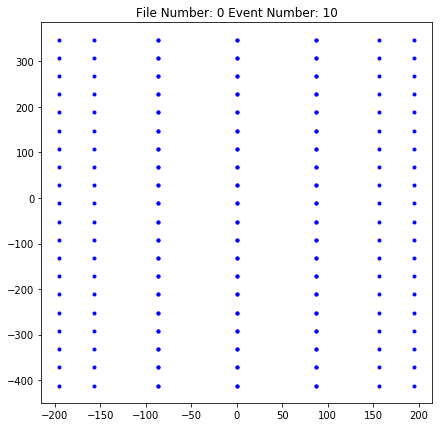

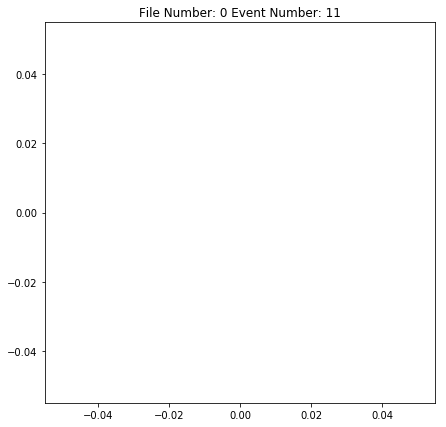

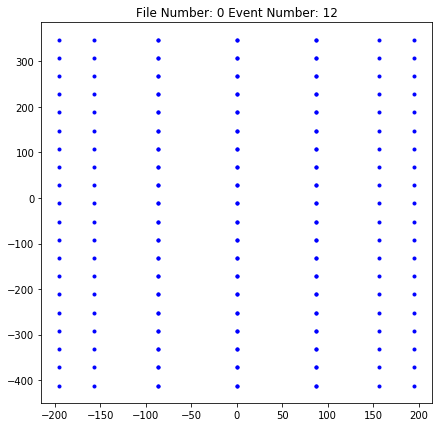

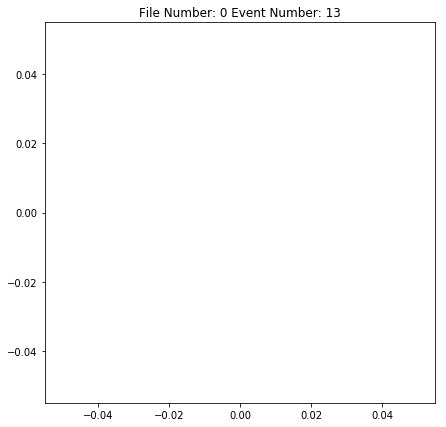

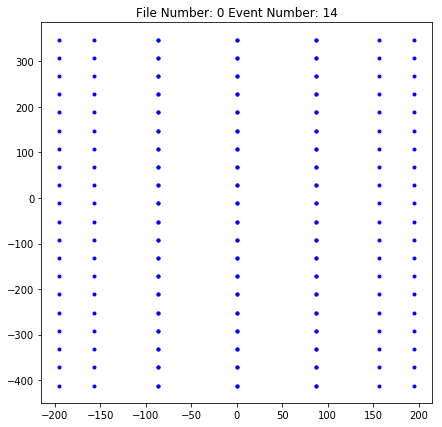

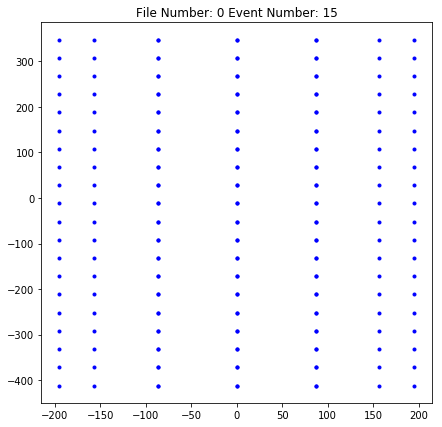

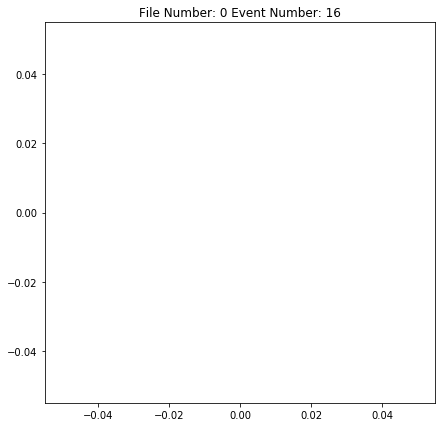

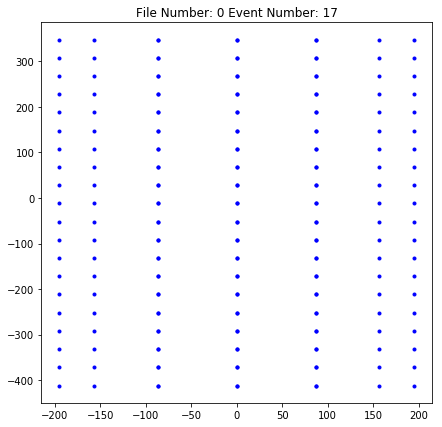

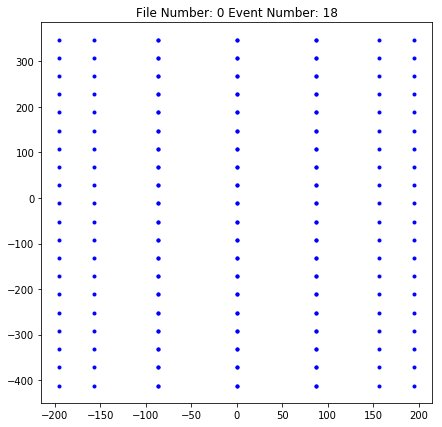

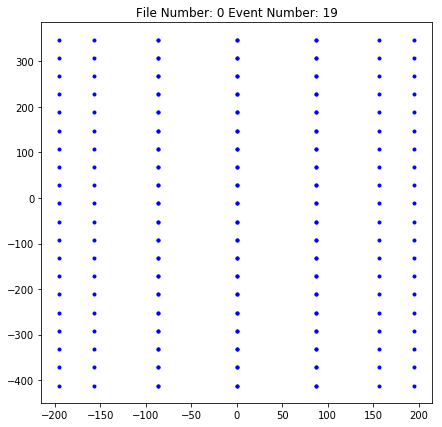

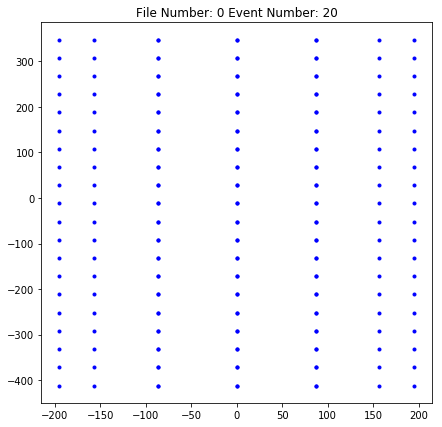

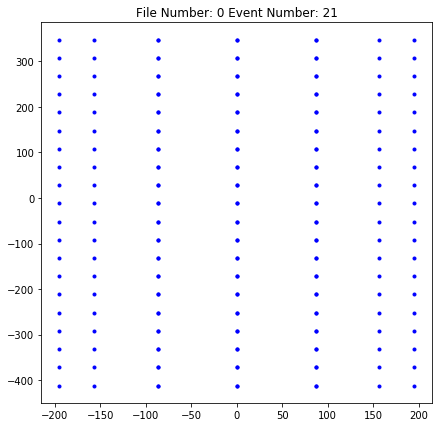

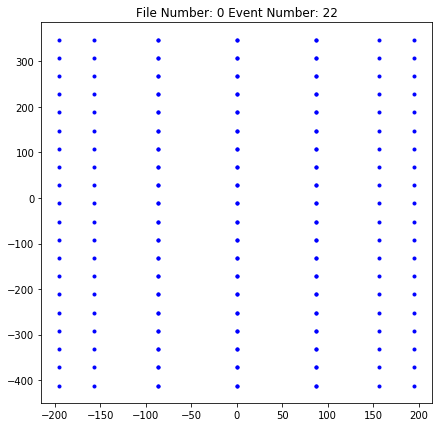

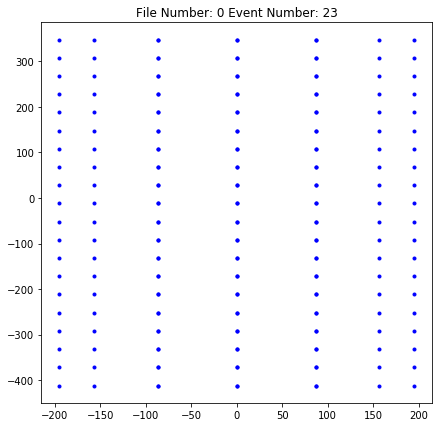

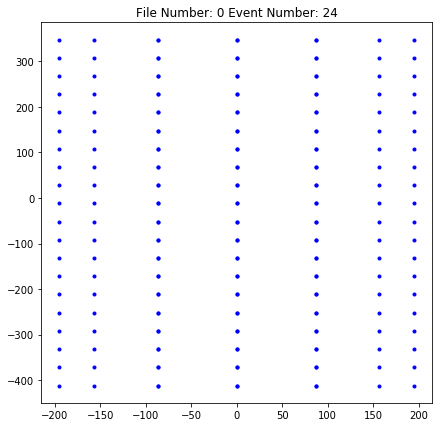

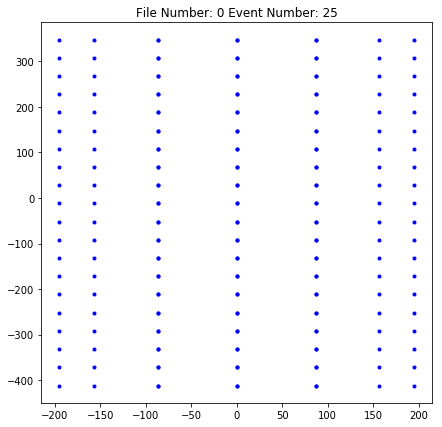

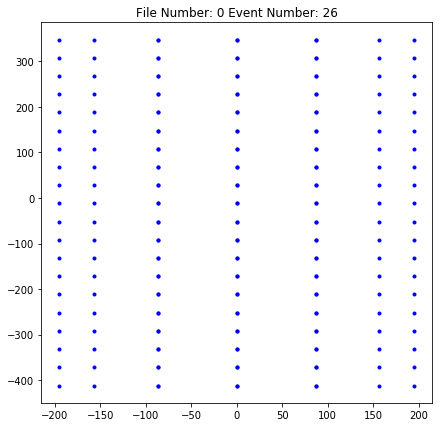

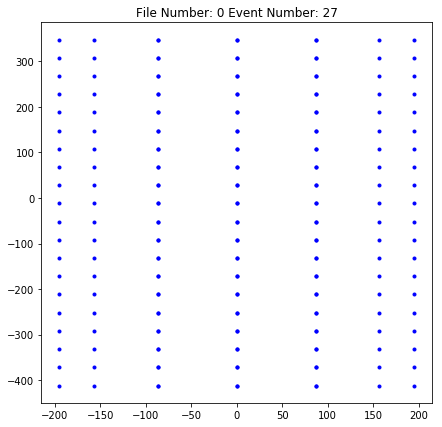

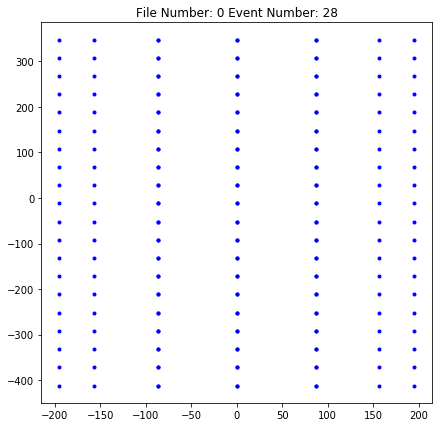

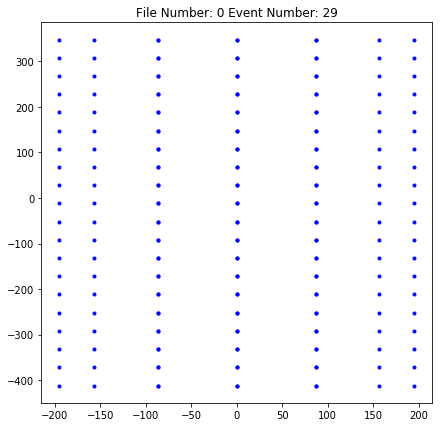

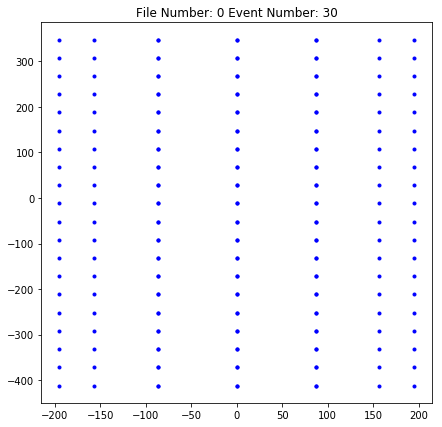

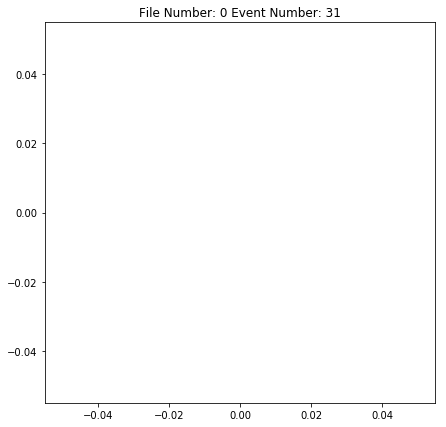

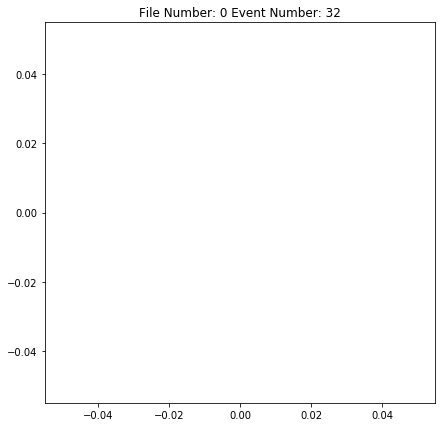

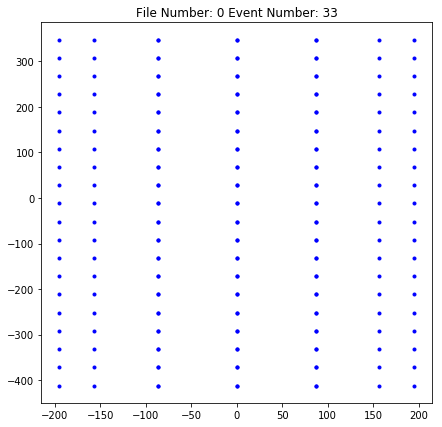

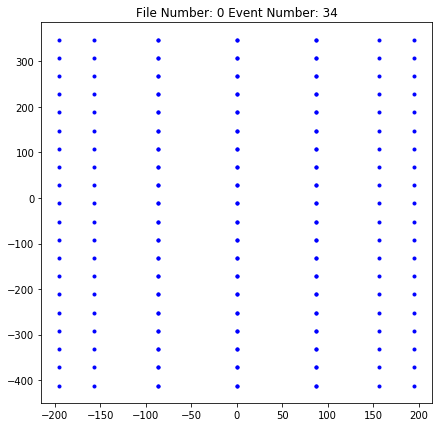

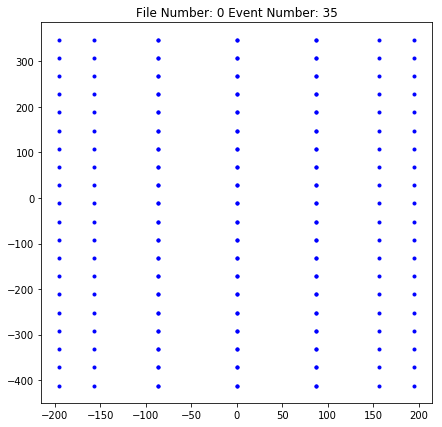

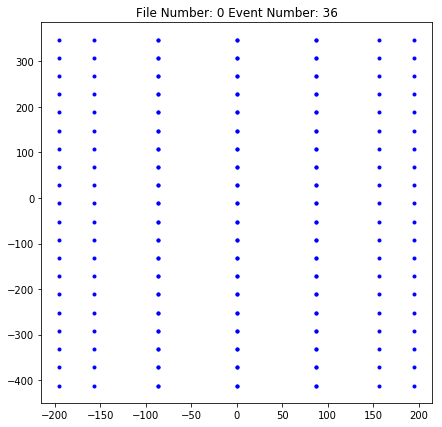

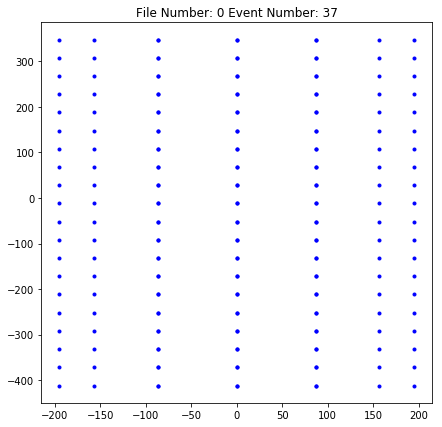

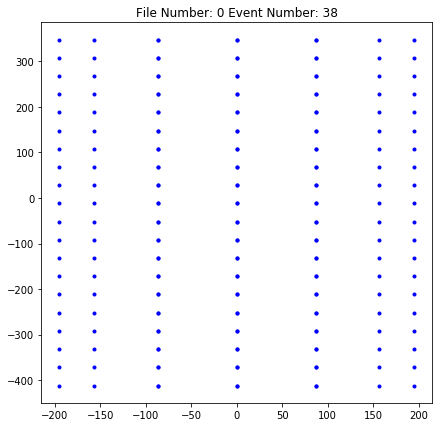

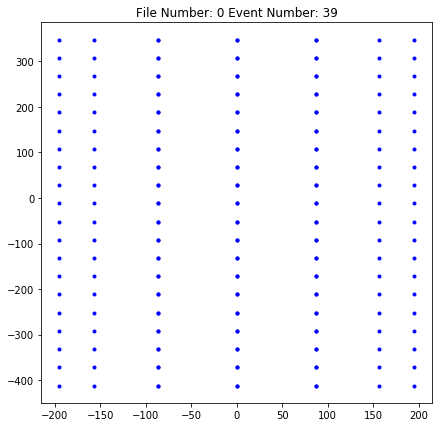

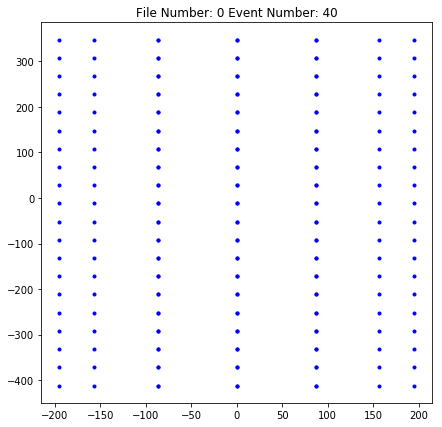

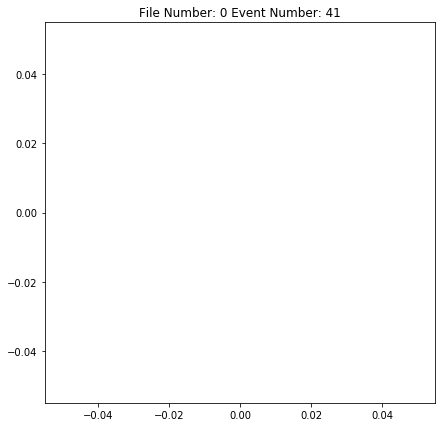

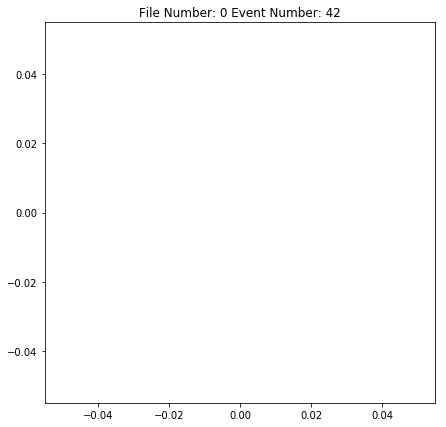

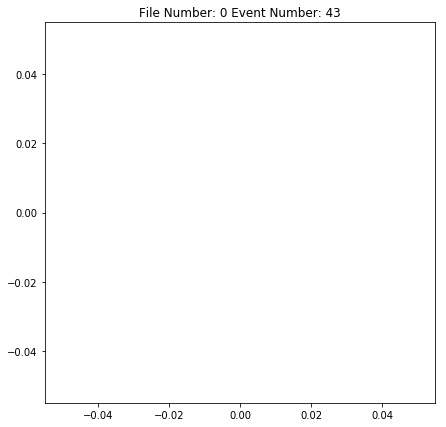

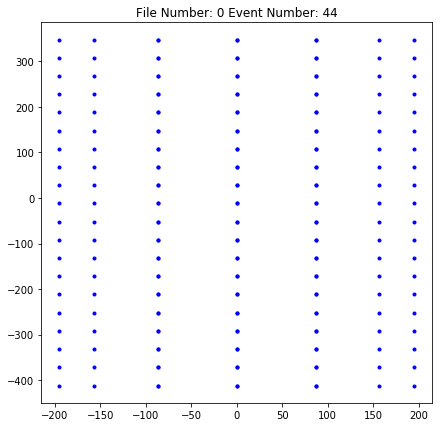

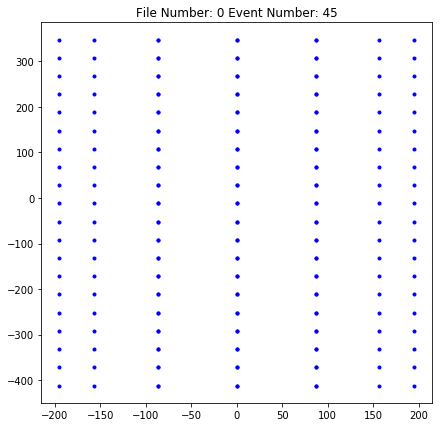

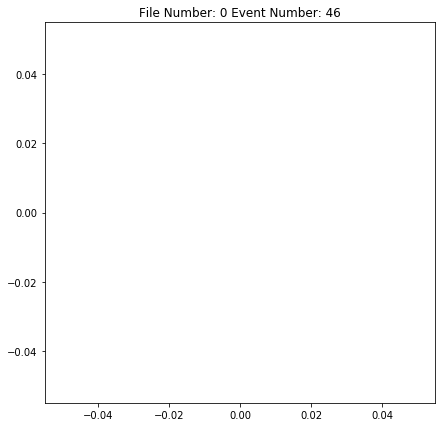

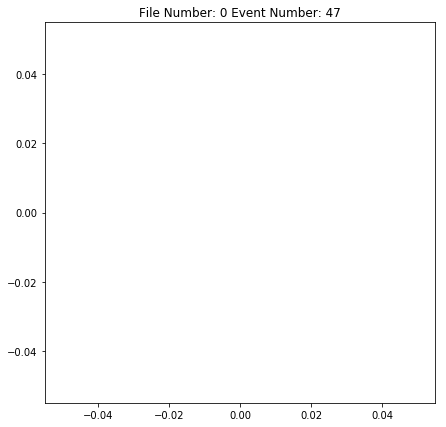

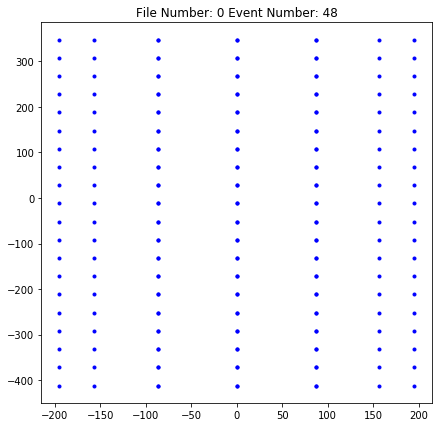

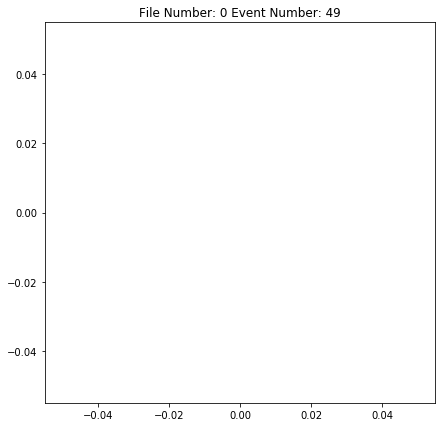

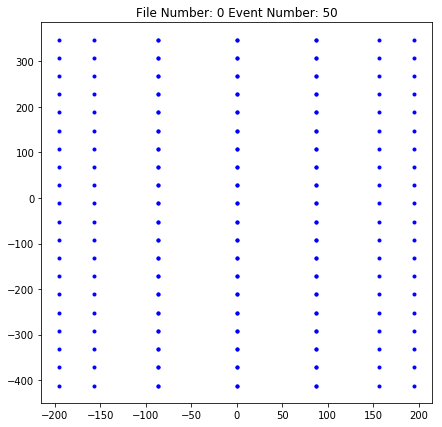

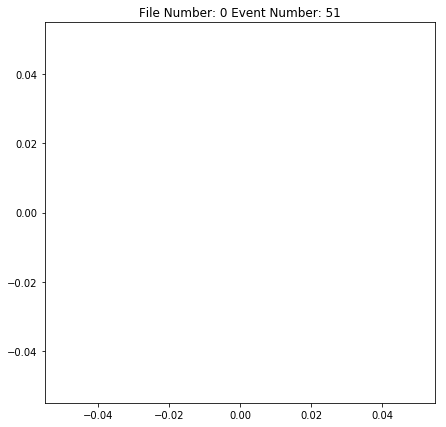

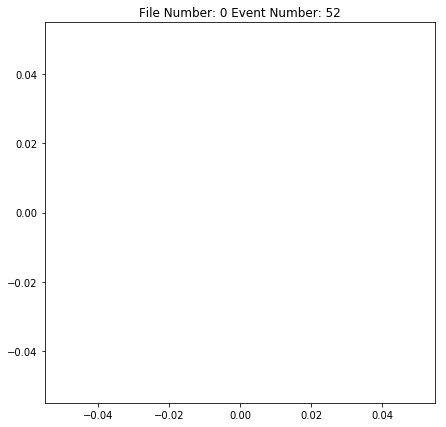

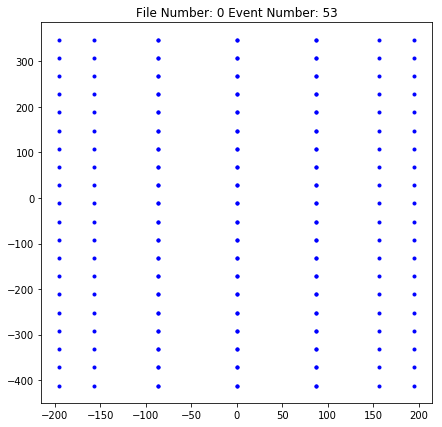

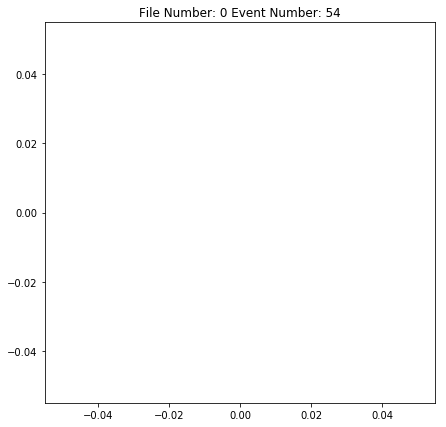

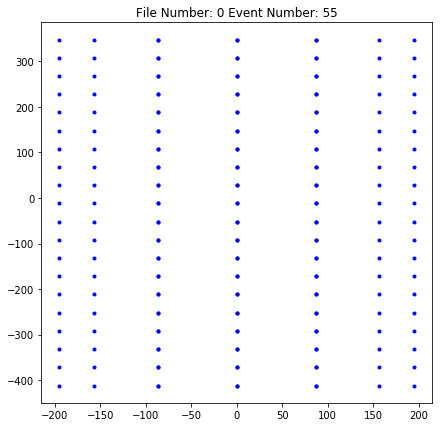

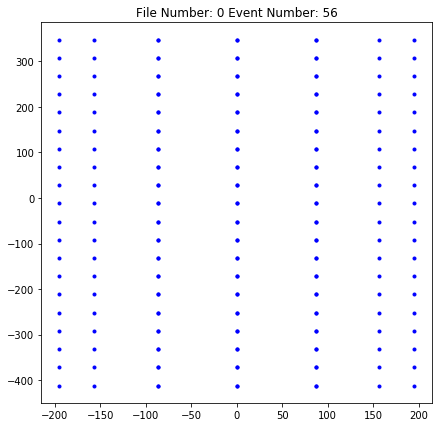

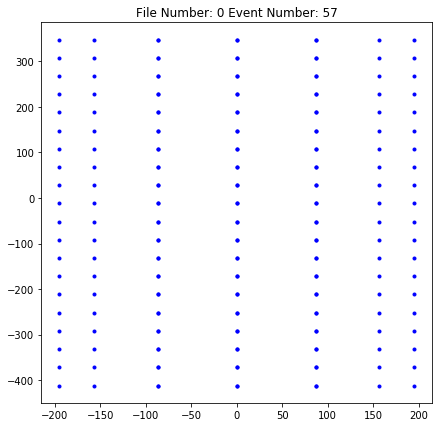

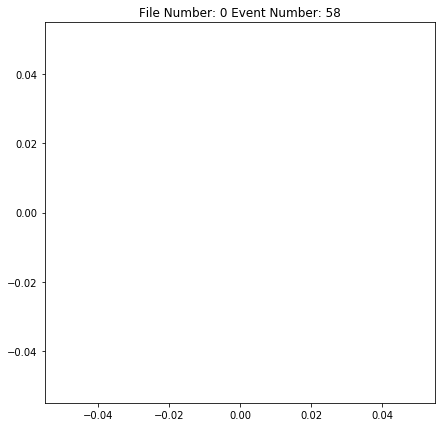

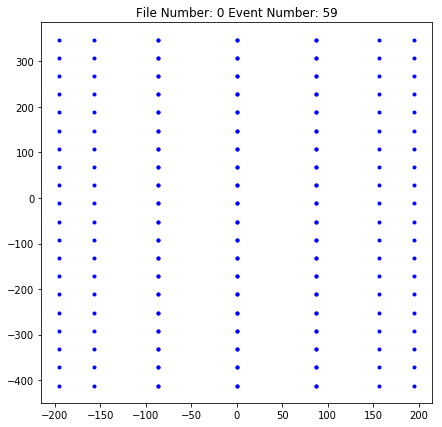

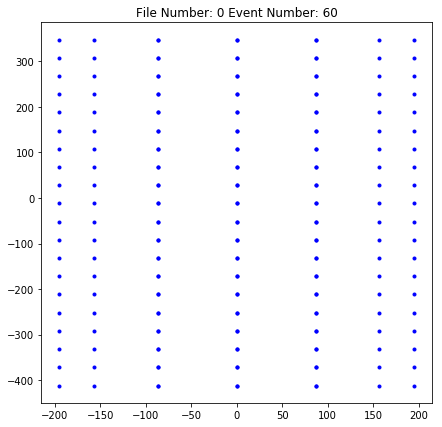

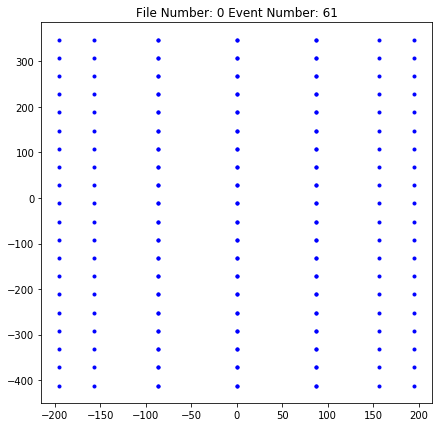

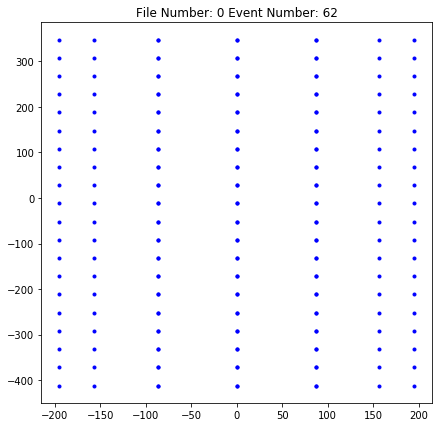

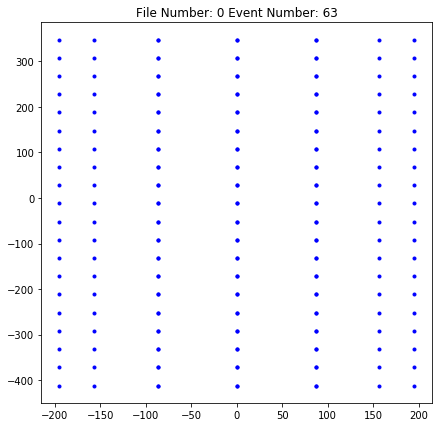

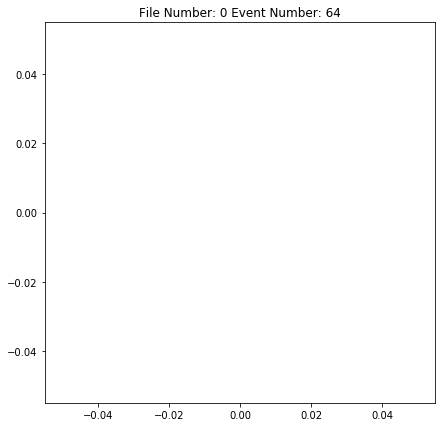

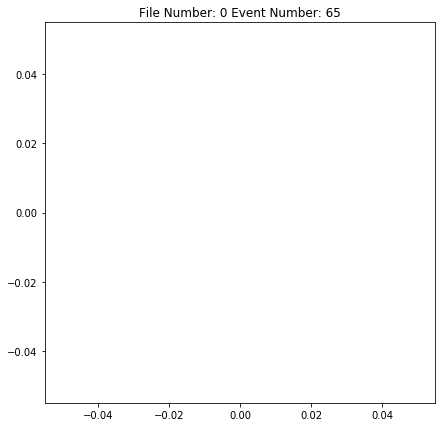

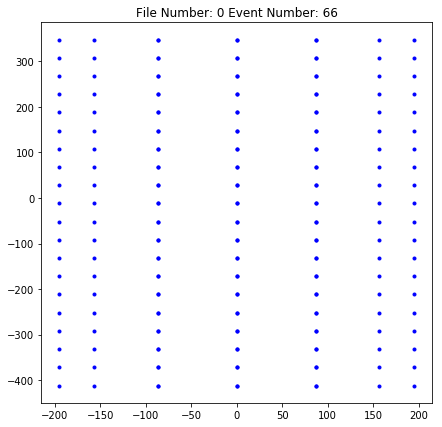

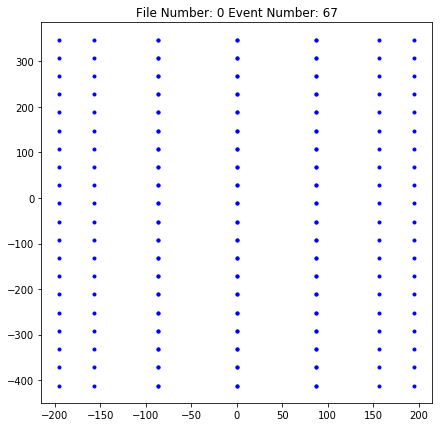

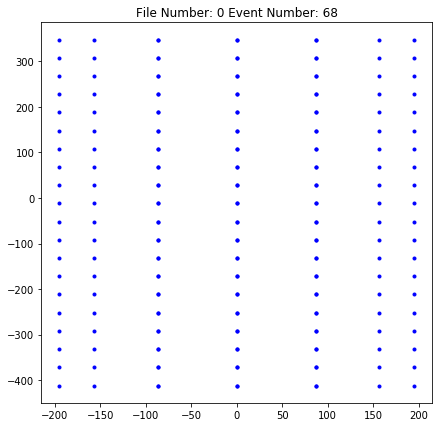

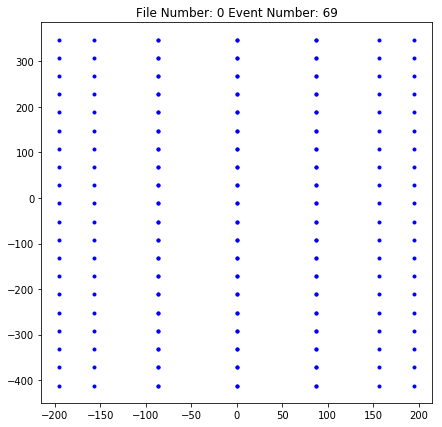

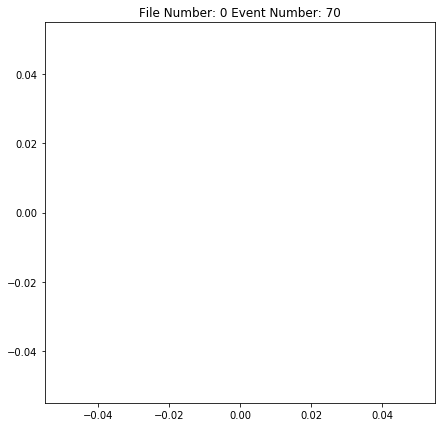

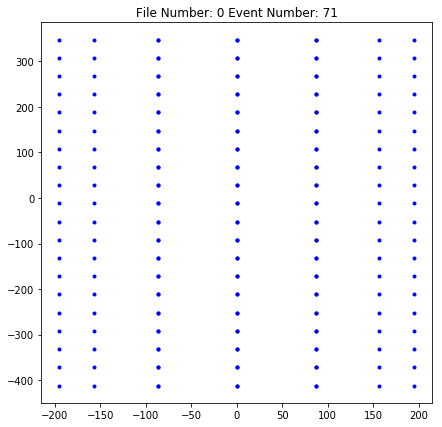

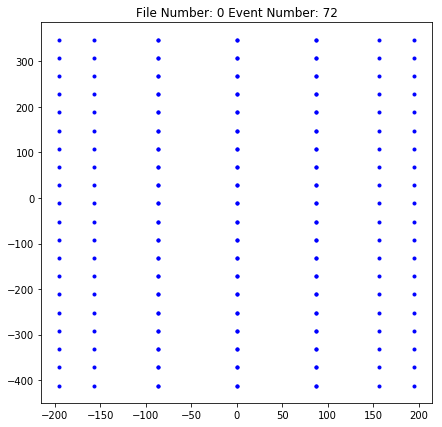

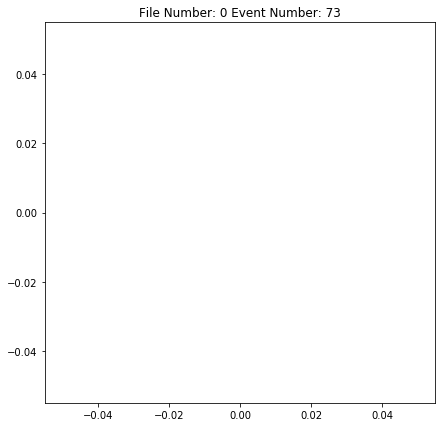

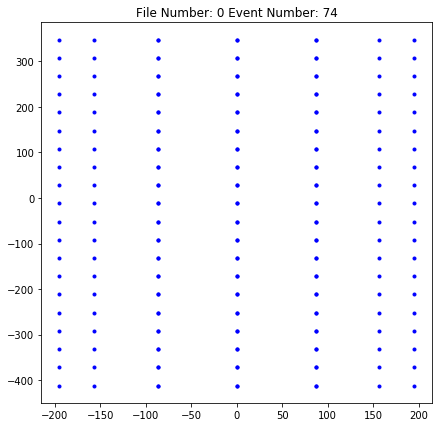

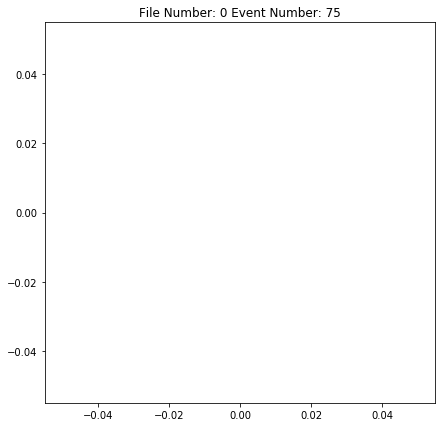

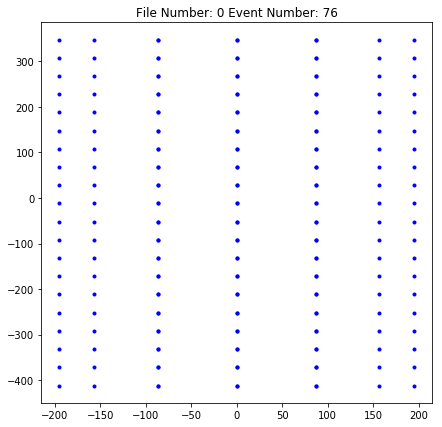

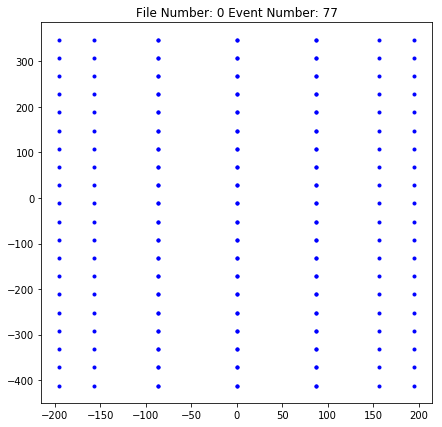

In [24]:
f = 0
for file_num in range(start,end):
    print(file_num)
    file = dataio.I3File('/data/p-one/akatil/step_4_medium_water/step_4_'+str(file_num)+'_medium_water_custom_mDOM_noise.i3.gz')
    
    xfv, yfv, zfv = ([]), ([]), ([])
    xsv, ysv, zsv = ([]), ([]), ([])
    charge = ([])
    
    maxHits = 0
    timestamps = 0
    
    frame_num = 0
    for frame in file:
        
        x, y, z = ([]), ([]), ([])
        x_selectDoms, y_selectDoms, z_selectDoms = ([]), ([]), ([])
        #print(frame.keys())
        mctree = frame["I3MCTree"]
        primary = mctree.primaries
        lepton = dataclasses.I3MCTree.first_child(mctree, primary[0].id)

        if lepton.type == 15 or lepton.type == -15:
            
            tau_daughters = dataclasses.I3MCTree.get_daughters(mctree, lepton.id)
            tau_pos = lepton.pos
            x_tau_pos = tau_pos.x
            y_tau_pos = tau_pos.y
            z_tau_pos = tau_pos.z
            tau_energy = lepton.energy

            for td in range(0, len(tau_daughters)):
                if tau_daughters[td].type == 16 or tau_daughters[td].type == -16:
                    #print(tau_daughters[td])
                    tau_daughters_pos = tau_daughters[td].pos
                    x_td_pos = tau_daughters_pos.x
                    y_td_pos = tau_daughters_pos.y
                    z_td_pos = tau_daughters_pos.z
                    
            mcpeMap = frame['MCPESeriesMap']
            noiseMap = frame['NoiseSeriesMap']
                
            for omkey in noiseMap.keys():
                oKey = omgeo.get(omkey)
                
                domPos = oKey.position
                x = np.append(x, domPos.x)
                y = np.append(y, domPos.y)
                z = np.append(z, domPos.z)
                
                noise_mcpeList = noiseMap[omkey]
                noise_timeList = np.array([mcpe.time for mcpe in noise_mcpeList])
            
                if omkey in mcpeMap.keys():
                    mcpeList = mcpeMap[omkey]
                    timeList = np.array([mcpe.time for mcpe in mcpeList])
                    tot_timeList = np.append(timeList, noise_timeList)
                else:
                    tot_timeList = noise_timeList
                
                firstVertex = np.sqrt((x_dom - x_tau_pos)**2 + (y_dom - y_tau_pos)**2 + (z_dom - z_tau_pos)**2)
                secondVertex = np.sqrt((x_dom - x_td_pos)**2 + (y_dom - y_td_pos)**2 + (z_dom - z_td_pos)**2)
                refractiveIndex = 1.333
                speed_of_light_water = (spc.c)/refractiveIndex #[Units: m/seconds]
                speed_of_light_ns = speed_of_light_water
                
                tDiff_ns = ((firstVertex - secondVertex)/speed_of_light_water) * 1e9 #[Units: nanoseconds]

                if abs(tDiff_ns) > 10 and abs(tDiff_ns) < 200 and firstVertex < 250 and secondVertex < 250 and len(tot_timeList) > 100:
                    x_selectDoms = np.append(x_selectDoms, domPos.x)
                    y_selectDoms = np.append(y_selectDoms, domPos.y)
                    z_selectDoms = np.append(z_selectDoms, domPos.z)
                    
        fig = plt.figure(figsize=(7,7))
        #ax = fig.add_subplot(111, projection = '3d')
        plt.plot(y, z, '.', c = 'b')
        plt.plot(y_selectDoms, z_selectDoms, '.', c = 'r')
        #ax.scatter(x, y, z, zdir='z', s=20, c='b',rasterized=True)
        #ax.scatter(x_selectDoms, y_selectDoms, z_selectDoms, zdir='z', s=20, c='k',rasterized=True)
        #zlabel = ax.set_zlabel('\n$z$ (m)',fontsize=16)
        #ylabel = ax.set_ylabel('\n$y$ (m)',fontsize=16)
        #xlabel = ax.set_xlabel('\n$x$ (m)',fontsize=16)
        plt.title('File Number: ' + str(file_num) + ' Event Number: ' + str(frame_num))
        frame_num+=1          

In [6]:
fig = plt.figure(figsize=(7,7))
fig.add_subplot?